In [65]:
import numpy
import matplotlib
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
def funEXP(x, A, c, d):
    return A*np.exp(c*x) + d

In [67]:
def enveloppe(s):
    u_x =array([0]) # do not add 0
    u_y = array([0])
    q_u = np.zeros(s.shape)
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x=append(u_x,float(k))
            u_y=append(u_y,s[k])
    u_p = interp1d(u_x,u_y,fill_value="extrapolate")#,kind = 'cubic')#,fill_value="extrapolate")
    for k in range(0,len(s)):
        q_u[k] = u_p(float(k+0.1))
    return q_u

In [68]:
N=120
day=arange(N)
data=zeros(N)
for i in range(N):
    data[i]=10.*sin(2.*pi/15.*i)/sqrt(i+1)

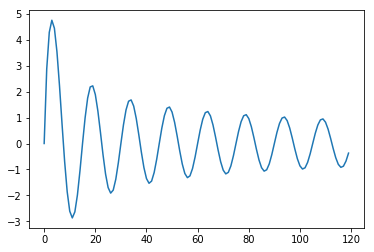

In [69]:
plot(arange(N),data)

In [70]:
Gh= enveloppe(data)
Gn=Gh[10:]
day1=day[:-10]
print(len(Gn),len(Gh))

110 120


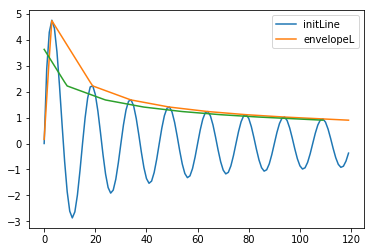

In [71]:
plot(day,data,label='initLine',)
plot(day,Gh,label='envelopeL',)
plot(Gn)
legend()

In [72]:
#d= 0 #initial guess
p0=[2.,-0.5,1.]
#A=1.
#c=-1.
popt, pcov = curve_fit(funEXP, day, Gh,p0=p0)
print(popt,pcov)
A=popt[0]
c=popt[1]
d=popt[2]

[ 2.93752289 -0.03058708  0.81922278] [[  2.76767175e-02  -9.85022382e-05  -5.19463038e-03]
 [ -9.85022382e-05   2.23277191e-05  -4.87332917e-04]
 [ -5.19463038e-03  -4.87332917e-04   1.44601130e-02]]


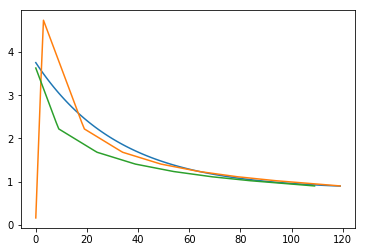

In [73]:
#plot(day,funEXP(day,*popt))
plot(day,funEXP(day,A,c,d))
plot(day,Gh)
plot(day1,Gn)